In [11]:
import pandas as pd
import numpy as np

customers = pd.read_csv("../data/customers.csv")
products = pd.read_csv("../data/products.csv")
orders = pd.read_csv("../data/orders.csv")
order_items = pd.read_csv("../data/order_items.csv")
returns = pd.read_csv("../data/returns.csv")

print("Customers:", customers.shape)
print("Products:", products.shape)
print("Orders:", orders.shape)
print("Order Items:", order_items.shape)
print("Returns:", returns.shape)

orders.head()

Customers: (50000, 7)
Products: (500, 4)
Orders: (120000, 5)
Order Items: (360405, 4)
Returns: (9600, 3)


,order_id,customer_id,order_date,payment_method,status
0,1,19126,2025-09-29,Apple Pay,Processing
1,2,46626,2024-06-22,Apple Pay,Shipped
2,3,27530,2024-10-23,Apple Pay,Processing
3,4,48336,2024-01-05,Apple Pay,Delivered
4,5,31700,2025-11-01,Credit Card,Processing


In [12]:
customers.head()

,customer_id,name,email,city,state,acquisition_channel,signup_date
0,1,Mary Bray,williamszachary@example.org,Kristinstad,North Dakota,Facebook,2024-02-06
1,2,Nicholas Nguyen,peterjackson@example.net,New Dianeport,Rhode Island,Facebook,2025-10-11
2,3,Sergio Ali,clarencefowler@example.net,Joannamouth,Maryland,Referral,2023-10-20
3,4,Victoria Jackson,ywolf@example.com,Booneview,Colorado,Instagram,2023-04-10
4,5,Michael Harris,rodriguezmegan@example.com,New Melissaside,Missouri,Facebook,2023-11-06


In [13]:
products.head()

,product_id,product_name,category,price
0,1,Society,Toys,258.15
1,2,Score,Sports,235.48
2,3,Nothing,Clothing,76.28
3,4,Including,Clothing,121.46
4,5,Lead,Home,292.15


In [14]:
orders.head()

,order_id,customer_id,order_date,payment_method,status
0,1,19126,2025-09-29,Apple Pay,Processing
1,2,46626,2024-06-22,Apple Pay,Shipped
2,3,27530,2024-10-23,Apple Pay,Processing
3,4,48336,2024-01-05,Apple Pay,Delivered
4,5,31700,2025-11-01,Credit Card,Processing


In [15]:
order_items.head()

,order_id,product_id,quantity,total_price
0,1,409,2,27.58
1,1,301,3,151.83
2,2,33,3,231.06
3,2,378,3,623.88
4,2,350,3,392.82


In [18]:
#convert date columns
customers['signup_date'] = pd.to_datetime(customers['signup_date'])
orders['order_date'] = pd.to_datetime(orders['order_date'])
returns['return_date'] = pd.to_datetime(returns['return_date'])

# Create full order dataset by joining order_items
full_data = (order_items
             .merge(orders, on = 'order_id', how = "left")
             .merge(customers, on = 'customer_id', how = "left")
             .merge(products, on ='product_id', how = "left")
            )

full_data.head()

,order_id,product_id,quantity,total_price,customer_id,order_date,payment_method,status,name,email,city,state,acquisition_channel,signup_date,product_name,category,price
0,1,409,2,27.58,19126,2025-09-29,Apple Pay,Processing,Thomas Rasmussen,staciewells@example.org,Muellertown,Colorado,Google Ads,2025-01-30,Thus,Clothing,13.79
1,1,301,3,151.83,19126,2025-09-29,Apple Pay,Processing,Thomas Rasmussen,staciewells@example.org,Muellertown,Colorado,Google Ads,2025-01-30,Painting,Clothing,50.61
2,2,33,3,231.06,46626,2024-06-22,Apple Pay,Shipped,Beth Walsh,kingjasmin@example.net,Smithbury,South Carolina,Instagram,2025-09-14,Whether,Toys,77.02
3,2,378,3,623.88,46626,2024-06-22,Apple Pay,Shipped,Beth Walsh,kingjasmin@example.net,Smithbury,South Carolina,Instagram,2025-09-14,Statement,Toys,207.96
4,2,350,3,392.82,46626,2024-06-22,Apple Pay,Shipped,Beth Walsh,kingjasmin@example.net,Smithbury,South Carolina,Instagram,2025-09-14,Themselves,Beauty,130.94


In [21]:
#Basic KPI's
total_revenue = full_data['total_price'].sum()
total_orders = orders['order_id'].nunique()
total_customers = customers['customer_id'].nunique()
average_order_value = full_data.groupby("order_id")['total_price'].sum().mean()

print("Total Revenue:", round(total_revenue, 1))
print("Total Orders:", total_orders)
print("Total Customers:", total_customers)
print("Average Order Value (AOV):", round(average_order_value, 2))

Total Revenue: 181968345.0
Total Orders: 120000
Total Customers: 50000
Average Order Value (AOV): 1516.4


In [24]:
#Revenue by Product Category
category_revenue = full_data.groupby("category")['total_price'].sum().sort_values(ascending = False)
category_orders = full_data.groupby("category")['order_id'].nunique().sort_values(ascending = False)

print("Revenue by Category:")
print(category_revenue)
print("\nOrders by Category:")
print(category_orders)

Revenue by Category:
category
Beauty         32014459.66
Electronics    31919273.24
Home           31126464.38
Clothing       29402142.99
Toys           29156234.46
Sports         28349770.23
Name: total_price, dtype: float64

Orders by Category:
category
Sports         50462
Electronics    49567
Beauty         49177
Clothing       48078
Home           47498
Toys           44775
Name: order_id, dtype: int64


In [25]:
#Monthly Revenue Trend
full_data['year_month'] = full_data['order_date'].dt.to_period('M')

monthly_revenue = (full_data
                   .groupby('year_month')['total_price']
                   .sum()
                   .reset_index())

monthly_revenue.head()

,year_month,total_price
0,2023-11,539546.86
1,2023-12,7761085.28
2,2024-01,7760237.28
3,2024-02,7253196.34
4,2024-03,7668637.97


In [26]:
#Customer Insights

#Total spend per customer
customer_spend = (full_data.groupby('customer_id')['total_price']
                  .sum()
                  .sort_values(ascending=False))

top_10_customers = customer_spend.head(10)

#Channel revenue
channel_revenue = (full_data.groupby('acquisition_channel')['total_price']
                   .sum()
                   .sort_values(ascending=False))

#Repeat customers
order_counts = orders.groupby('customer_id')['order_id'].count()
repeat_customers = order_counts[order_counts > 1].count()
repeat_rate = repeat_customers / total_customers * 100

print("Top 10 Customers by Spend:\n", top_10_customers)
print("\nRevenue by Acquisition Channel:\n", channel_revenue)
print("\nRepeat Customer Rate:", round(repeat_rate, 2), "%")

Top 10 Customers by Spend:
 customer_id
37093    20976.02
16255    20775.43
19185    20668.78
36608    19149.89
3232     19102.82
4165     19090.70
22116    18516.61
31220    18296.74
31717    18239.44
39813    18176.17
Name: total_price, dtype: float64

Revenue by Acquisition Channel:
 acquisition_channel
Google Ads    37072374.01
Referral      36674161.78
Facebook      36174029.47
Organic       36138692.93
Instagram     35909086.77
Name: total_price, dtype: float64

Repeat Customer Rate: 68.85 %


In [27]:
#Return Rate
total_returns = returns['order_id'].nunique()
return_rate = total_returns / total_orders * 100

print("Total Returns:", total_returns)
print("Return Rate:", round(return_rate, 2), "%")

#Return Reason Distribution
return_reason_counts = returns['return_reason'].value_counts()

print("\nReturn Reason Breakdown:")
print(return_reason_counts)

Total Returns: 9600
Return Rate: 8.0 %

Return Reason Breakdown:
return_reason
Wrong Item     2427
Bad Quality    2419
Not Needed     2416
Damaged        2338
Name: count, dtype: int64


In [28]:
!pip install matplotlib seaborn

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

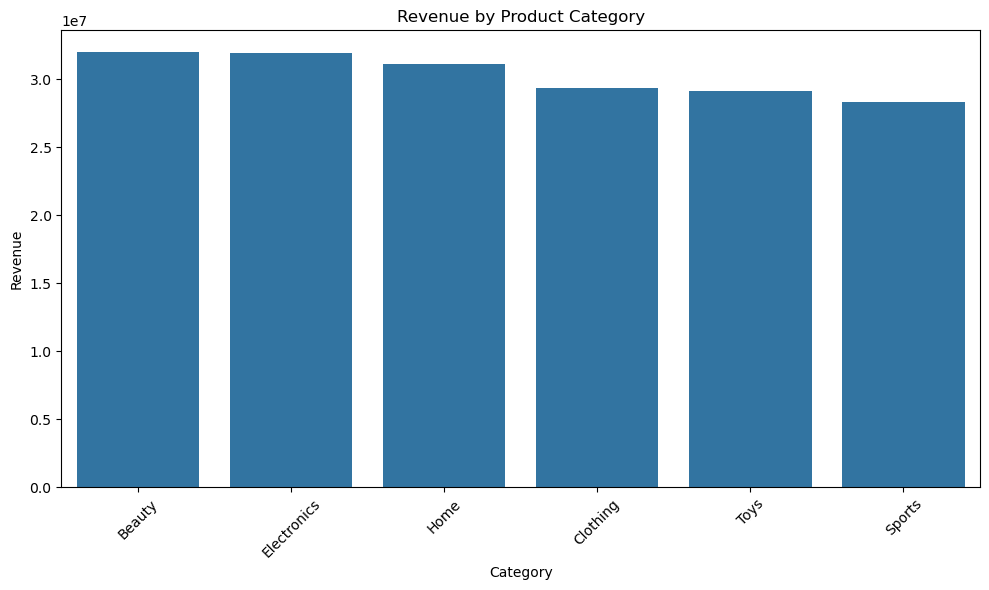

In [30]:
plt.figure(figsize=(10,6))
sns.barplot(x=category_revenue.index, y=category_revenue.values)
plt.title("Revenue by Product Category")
plt.xlabel("Category")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("../images/revenue_by_category.png")
plt.show()

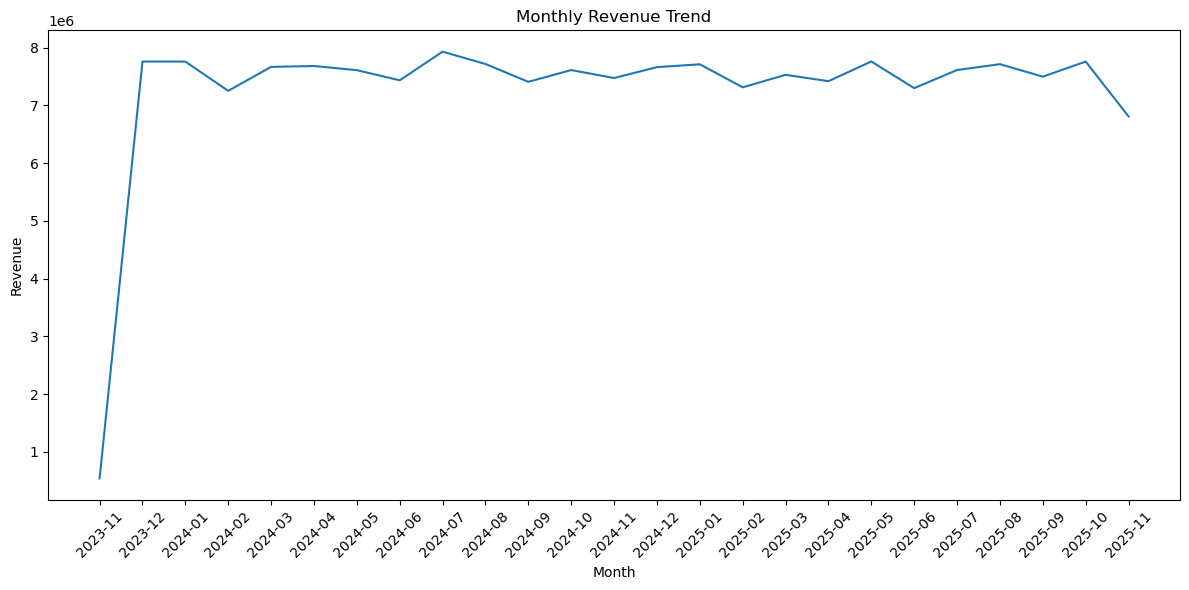

In [33]:
# Make a copy and convert year_month to string for plotting
monthly_rev_plot = monthly_revenue.copy()
monthly_rev_plot['year_month'] = monthly_rev_plot['year_month'].astype(str)

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_rev_plot, x='year_month', y='total_price')
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("../images/monthly_revenue_trend.png")
plt.show()

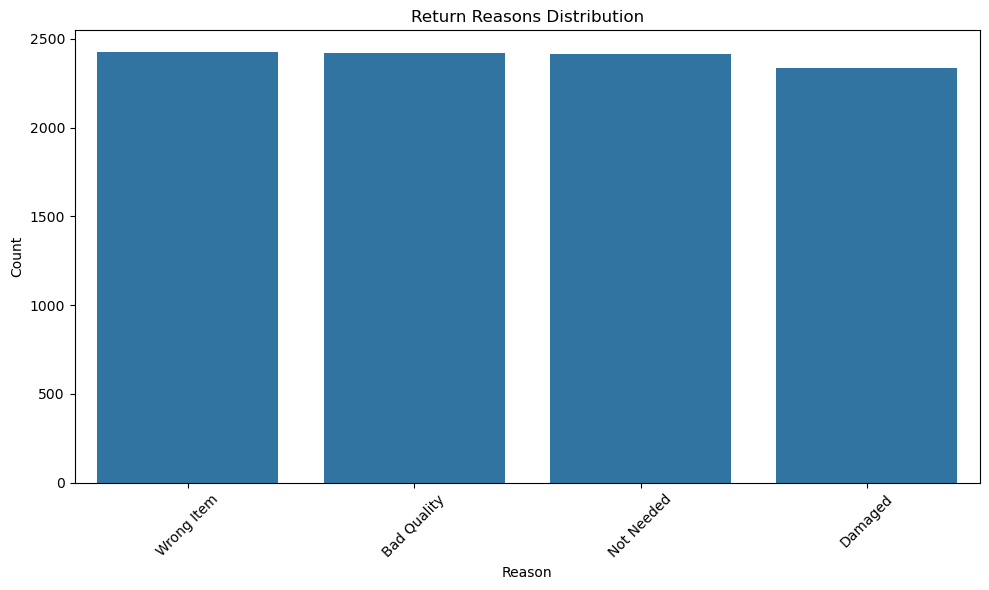

In [32]:
plt.figure(figsize=(10,6))
sns.barplot(x=return_reason_counts.index, y=return_reason_counts.values)
plt.title("Return Reasons Distribution")
plt.xlabel("Reason")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("../images/return_reasons.png")
plt.show()